In [1]:
#Liberías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Pregunta 1:
Con el 100% de los datos (“churn-bigml-80.csv” + “churn-bigml-20.csv”):
- ¿Cuál es la variable que tiene mayor dispersión? Comentar los hallazgos. (1 punto)
- ¿Cuáles son las variables que se aproximan a una distribución normal? ¿Cuáles son las variables que no se aproximan a una distribución normal? Comentar los hallazgos. (2 puntos)
- Presentar la matriz de correlación. Comentar los hallazgos. (1 punto)
- Según corresponda, aplicar la prueba de correlación. Comentar los hallazgos. (1 punto)
- Según corresponda, aplicar la prueba chi-cuadrado. Comentar los hallazgos. (1 punto)
- Según corresponda, presentar un gráfico de violín entre el target y las variables. Comentar los hallazgos. (1 punto)

In [3]:
#leer DF
d1 = pd.read_csv("churn-bigml-20.csv")
d2 = pd.read_csv("churn-bigml-80.csv")

In [4]:
d1.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
111,NY,157,415,No,No,0,224.5,111,38.17,200.7,99,17.06,116.6,118,5.25,11.5,2,3.11,2,False
98,ME,75,408,Yes,No,0,211.3,61,35.92,105.6,119,8.98,175.9,63,7.92,9.7,4,2.62,4,True
535,WI,74,408,No,No,0,177.4,136,30.16,240.3,104,20.43,237.3,133,10.68,12.0,3,3.24,0,False
546,ID,130,415,No,No,0,263.7,113,44.83,186.5,103,15.85,195.3,99,8.79,18.3,6,4.94,1,True
645,WI,142,510,No,No,0,232.1,102,39.46,168.2,110,14.30,197.3,120,8.88,9.9,3,2.67,1,False
234,MO,55,510,No,No,0,189.0,100,32.13,118.5,99,10.07,248.1,87,11.16,17.1,6,4.62,0,False
591,MO,101,415,Yes,No,0,156.4,116,26.59,130.4,114,11.08,207.3,109,9.33,7.3,5,1.97,1,False
125,FL,79,510,No,No,0,130.2,119,22.13,290.9,121,24.73,194.8,140,8.77,14.0,6,3.78,3,False
388,WI,107,510,No,Yes,25,248.6,91,42.26,119.3,115,10.14,194.3,83,8.74,12.0,1,3.24,1,False
603,MA,142,408,No,No,0,216.8,134,36.86,187.8,106,15.96,138.1,108,6.21,8.3,2,2.24,0,False


In [5]:
d2.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
549,RI,94,415,No,No,0,139.4,95,23.70,159.1,92,13.52,128.2,129,5.77,7.7,3,2.08,0,False
343,NJ,100,415,No,No,0,203.8,122,34.65,283.1,76,24.06,197.3,83,8.88,12.5,3,3.38,0,False
2631,MI,119,510,Yes,Yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,True
1545,IL,76,510,No,No,0,186.1,96,31.64,211.6,100,17.99,230.6,100,10.38,8.0,4,2.16,0,False
2589,MI,142,415,Yes,No,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1,False
2567,MN,59,408,No,Yes,32,211.9,120,36.02,202.9,136,17.25,213.5,95,9.61,8.8,5,2.38,1,False
223,PA,92,408,No,Yes,28,151.1,90,25.69,194.8,79,16.56,239.2,114,10.76,10.0,3,2.70,1,False
158,MT,94,415,No,No,0,137.5,118,23.38,203.2,88,17.27,150.0,131,6.75,13.4,2,3.62,0,False
1915,WY,157,415,Yes,No,0,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,0,False
1397,WY,93,408,No,Yes,42,166.9,101,28.37,273.2,84,23.22,171.0,106,7.69,11.5,1,3.11,1,False


In [6]:
#Concatenar los DFs
df = pd.concat([pd.DataFrame(d1),pd.DataFrame(d2)])

In [7]:
df.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
909,NJ,129,415,No,No,0,168.4,117,28.63,217.1,129,18.45,81.6,100,3.67,11.8,7,3.19,1,False
1483,IN,69,408,No,No,0,185.3,91,31.50,219.1,88,18.62,243.6,107,10.96,5.5,5,1.49,0,False
66,CA,124,408,Yes,No,0,244.6,89,41.58,188.8,80,16.05,206.0,114,9.27,11.3,4,3.05,1,False
374,NV,71,415,Yes,No,0,178.2,113,30.29,167.8,94,14.26,182.1,111,8.19,13.6,3,3.67,3,True
192,DC,76,415,No,No,0,224.4,121,38.15,147.9,97,12.57,183.8,74,8.27,6.7,2,1.81,2,False
409,VT,193,408,No,Yes,17,124.0,102,21.08,202.9,81,17.25,205.1,129,9.23,12.3,3,3.32,1,False
2320,MA,123,415,No,No,0,209.4,49,35.60,237.4,117,20.18,239.2,98,10.76,9.8,11,2.65,1,False
394,OH,86,415,No,Yes,29,225.4,79,38.32,187.1,112,15.90,281.1,112,12.65,12.9,3,3.48,1,False
1545,IL,76,510,No,No,0,186.1,96,31.64,211.6,100,17.99,230.6,100,10.38,8.0,4,2.16,0,False
129,VA,139,510,No,Yes,23,157.6,129,26.79,247.0,96,21.00,259.2,112,11.66,13.7,2,3.70,0,False


In [8]:
df.shape

(3333, 20)

In [9]:
df['Churn'] = df['Churn'].astype(object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                      object
dtype: object

##Disperción de variables

In [13]:
CV = df.select_dtypes(include = [np.float64, np.int64])

for x in CV:
  z = CV[x].std(ddof = 0) / CV[x].mean()
  print("Variable ", x, "CV: ", z)

Variable  Account length CV:  0.3939663365880334
Variable  Area code CV:  0.09690447719725798
Variable  Number vmail messages CV:  1.6898746791463497
Variable  Total day minutes CV:  0.3029297072747906
Variable  Total day calls CV:  0.19979035933482509
Variable  Total day charge CV:  0.3029236413908617
Variable  Total eve minutes CV:  0.2522944980115825
Variable  Total eve calls CV:  0.19896891955124837
Variable  Total eve charge CV:  0.2522908507525671
Variable  Total night minutes CV:  0.25173369231818205
Variable  Total night calls CV:  0.19544621877945387
Variable  Total night charge CV:  0.25173687349158025
Variable  Total intl minutes CV:  0.27267174049778525
Variable  Total intl calls CV:  0.5493634604337738
Variable  Total intl charge CV:  0.2726125232301855
Variable  Customer service calls CV:  0.8415960563782461


- La variable más dispersa es Number vmail messages con un CV 1.69
- La variable menos dispersa es Area Code con un CV de 0.097

##Prueba de normalidad

In [14]:
#Obtener las variables numéricas
normalidad = df.select_dtypes(include = [np.float64, np.int64])

#Variables que siguen una distribución normal
for i in normalidad:
  stats, p_value = ss.shapiro(normalidad[i])
  
  if p_value <= 0.05:
    print("No Distribución normal:  ", i, " => ", p_value)

No Distribución normal:   Account length  =>  0.0011495520593598485
No Distribución normal:   Area code  =>  0.0
No Distribución normal:   Number vmail messages  =>  0.0
No Distribución normal:   Total day calls  =>  0.0002773392479866743
No Distribución normal:   Total eve calls  =>  0.00886891596019268
No Distribución normal:   Total intl minutes  =>  8.136633727895415e-11
No Distribución normal:   Total intl calls  =>  2.583573978675665e-41
No Distribución normal:   Total intl charge  =>  7.591647449567418e-11
No Distribución normal:   Customer service calls  =>  1.401298464324817e-45


In [15]:
#Variables que siguen una distribución normal
for i in normalidad:
  stats, p_value = ss.shapiro(normalidad[i])
  if p_value >= 0.05:
    print("Distribución normal: ", i, " => ", p_value)

Distribución normal:  Total day minutes  =>  0.6374387741088867
Distribución normal:  Total day charge  =>  0.641385018825531
Distribución normal:  Total eve minutes  =>  0.711155354976654
Distribución normal:  Total eve charge  =>  0.7044191360473633
Distribución normal:  Total night minutes  =>  0.6227363348007202
Distribución normal:  Total night calls  =>  0.25032323598861694
Distribución normal:  Total night charge  =>  0.6202784180641174


Luego de realizar la prueba de shapiro se obtiene que:
- Las variables Total day minutes, Total day charge, Total eve minutes, Total night minutes, Total night calls y Total night charge siguen una distribución normal ya que su pvalue es mayor a 5

- Las variables Account length, Area code, Number vmail messages, Total day calls, Total intl minutes, Total intl calls, Total intl charge y Customer Service calls no siguen una distribución normal ya que su pvalue es menor o igual a 5

##Matriz de correlación

Para las variables Account length, Area code, Number vmail messages, Total day calls, Total intl minutes, Total intl calls, Total intl charge y Customer Service se hará la prueba de correlación de Spearman ya que no se aproximan a una distribución normal

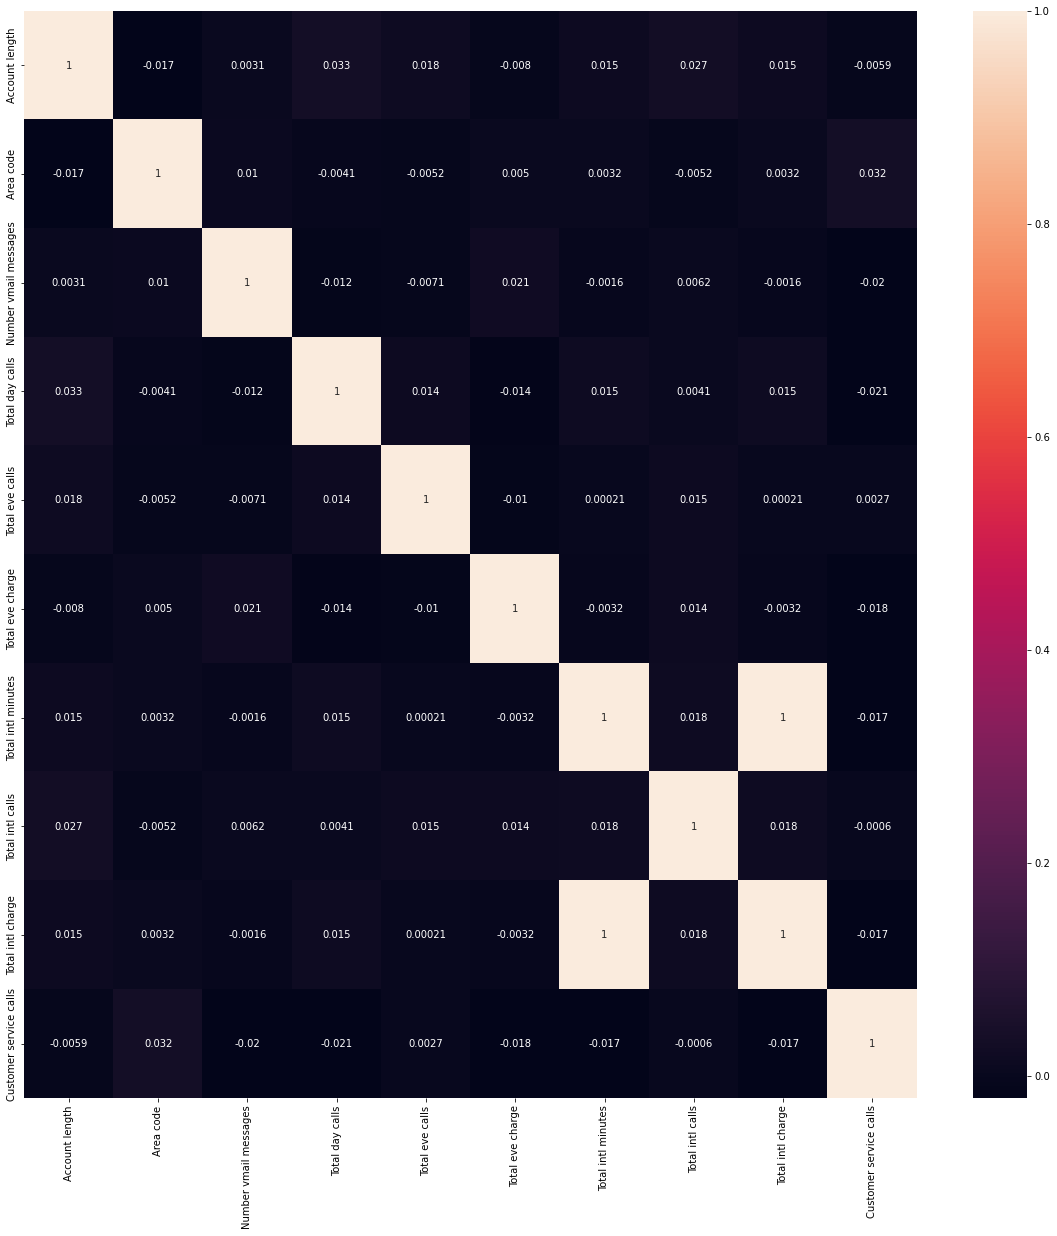

In [16]:
sp = df.copy()

sp.drop(['Total day minutes', 'Total day charge', 'Total eve minutes', 'Total night minutes', 'Total night calls', 'Total night charge'], axis=1, inplace=True)


plt.figure(figsize = (20,20))
sns.heatmap(sp.corr(method = 'spearman'), annot = True)
plt.show()

**Conclusión:** Se puede observar en el heatmap que casi ninguna variables está correlacionada a excepción de Total intl charge con Total intl minutes

Para las variables Total day minutes, Total day charge, Total eve minutes, Total night minutes, Total night calls y Total night charge se hará la prueba de correlación de Pearson ya que siguen una distribución normal

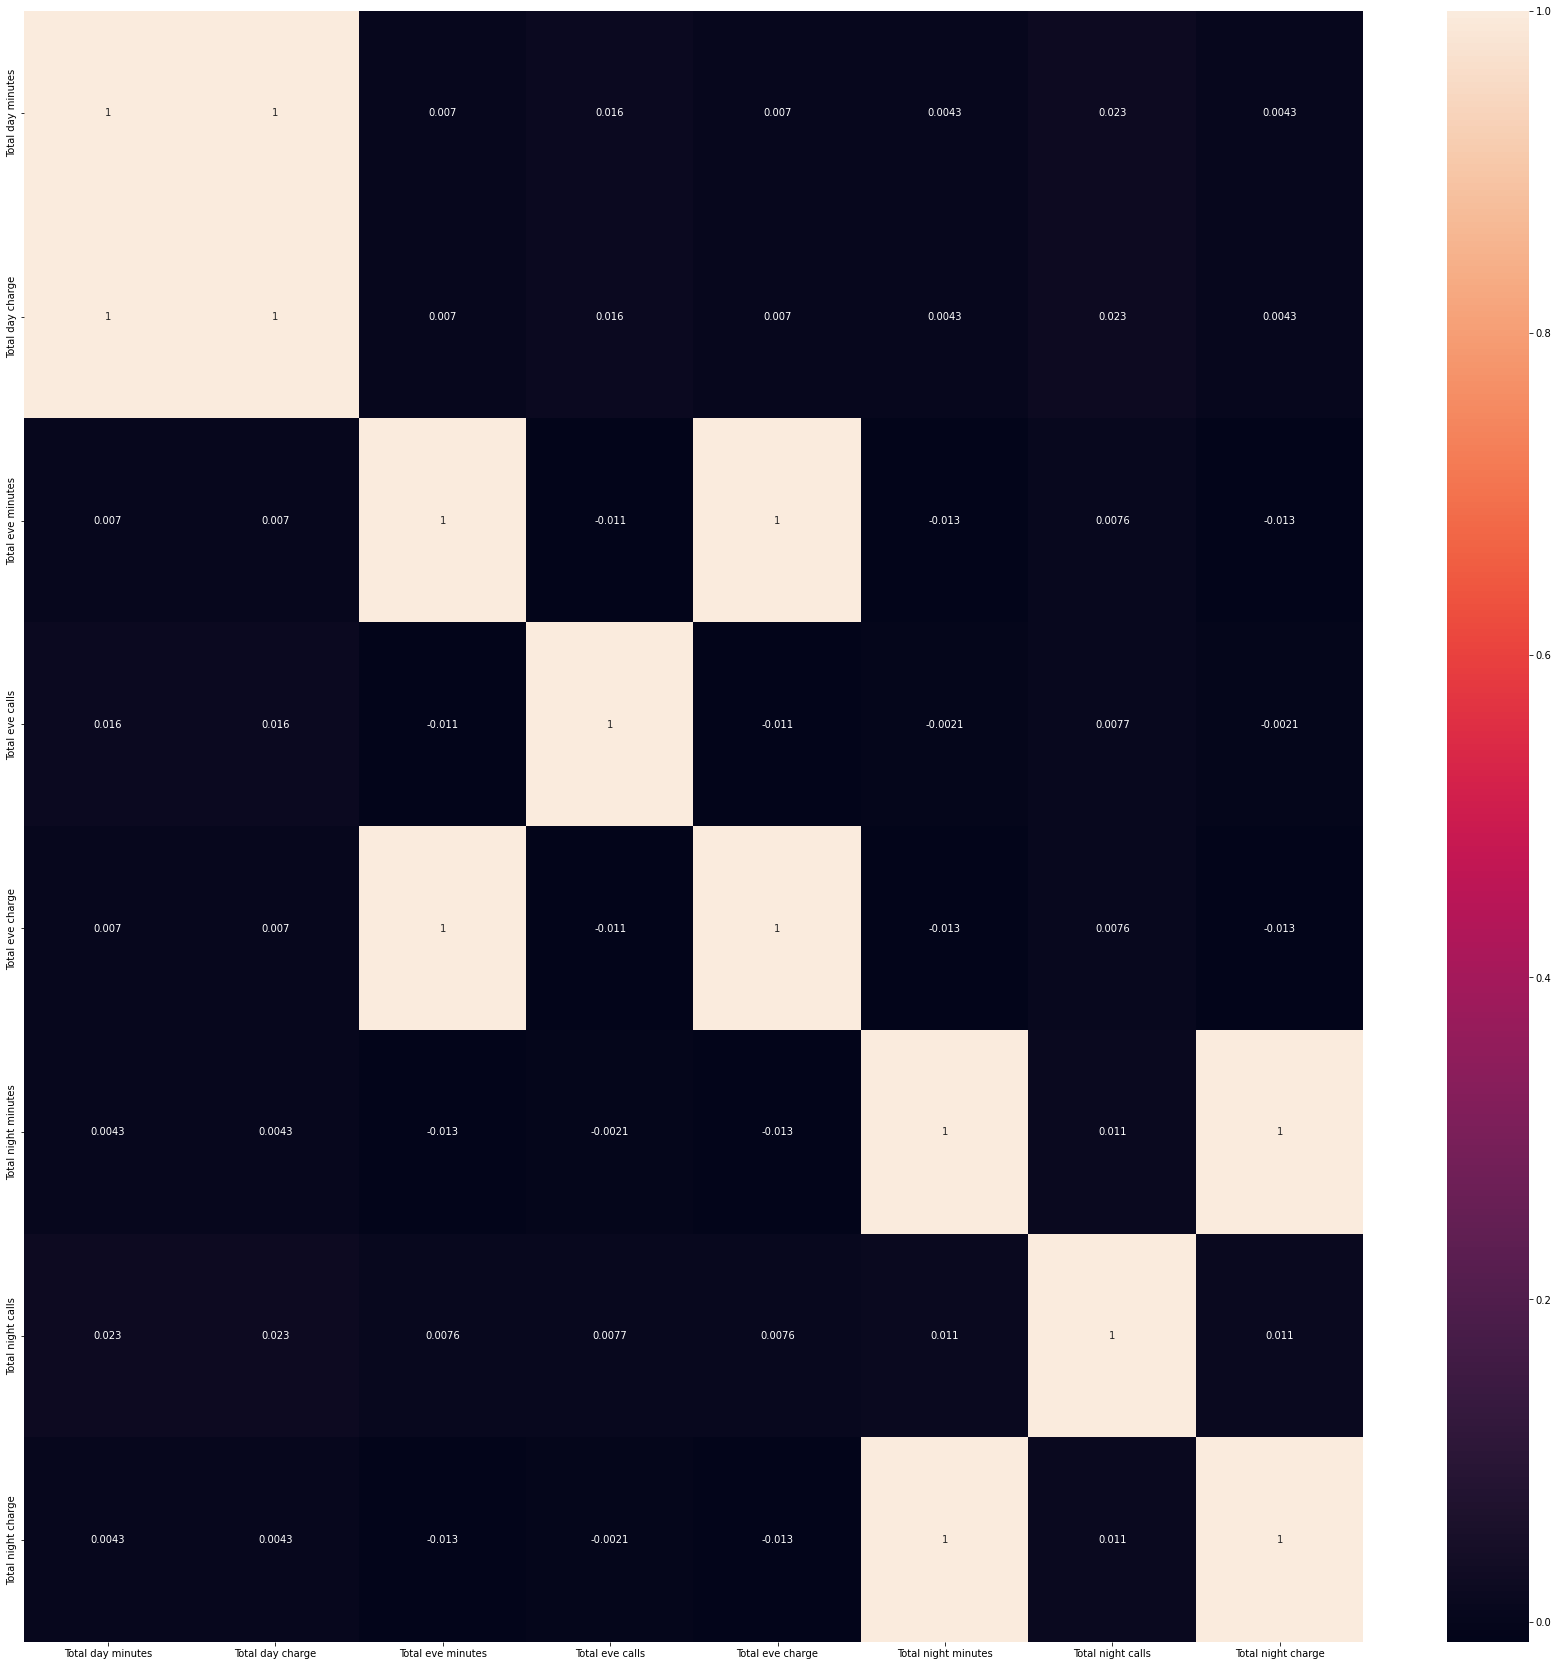

In [17]:
#Poner en un DF todos los atributos que siguen una distribución normal
copia = df.copy()
copia.drop(['Account length', 'Area code', 'Number vmail messages', 'Total day calls', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls'], axis=1, inplace=True)

plt.figure(figsize = (30,30))
sns.heatmap(copia.corr(method = 'pearson'), annot = True)
plt.show()

**Conclusión:** En base al heatmap realizado, se puede observar que casi ninguna variable está correlacionada a excepción de Total night calls con Total night minutes, se debe realizar una prueba para confirmar.

##Prueba de correlación

- Pvalue < 5% => no existe correlación entre las variables
- Pvalue >= 5% => existe correlación entre las variables

In [18]:
#Prueba de Spearman
ss.spearmanr(df['Total night minutes'], df['Total night calls'])

SpearmanrResult(correlation=0.008580325499661404, pvalue=0.6204703442860291)

In [19]:
#Prueba de Pearson
ss.pearsonr(df['Total intl charge'], df['Total intl minutes'])

(0.9999927417510318, 0.0)

**Conclusión:** 
- Luego de realizar la prueba de correlación, se puede concluir que las variables Total intl charge y Total intl minutes no están correlacionadas ya que su pvalue es menor a 5%

- Luego de realizar la prueba de correlación de Spearman, se puede concluir que las variables Total night minutes y Total night calls no están correlacionadas ya que su pvalue es menor a 5%

##Prueba de Chi-Cuadrado
- Si pvalor < 5% => existe dependencia entre las variables
- Si pvalor >= 5% => no existe dependencia entre las variables

In [20]:
chi = df.select_dtypes(include = [np.float64, np.int64])

for x in chi:
  variables = pd.crosstab(df[x], df['Churn'])
  c, pvalue, dof, expected = chi2_contingency(variables)

  #Mostrar las variables que tienen una dependencia con la variable objetivo
  if pvalue <= 0.05:
    print("Variable: ", x, " => ", pvalue)

Variable:  Number vmail messages  =>  0.020381511965517504
Variable:  Total day minutes  =>  2.0125191827544445e-09
Variable:  Total day calls  =>  0.02913941103845643
Variable:  Total day charge  =>  2.0125191827544445e-09
Variable:  Total intl minutes  =>  0.0048950066422646515
Variable:  Total intl calls  =>  0.00012589314865942488
Variable:  Total intl charge  =>  0.0048950066422646515
Variable:  Customer service calls  =>  2.243376519451563e-68


**Conclusión:** Luego de realizar la prueba de Chi, se concluyó que las variables Number vmail messages, Total day minutes, Total day calls, Total day charge, Total intl minutes, Total intl calls, Total intl charge y Customer service calls tienen una dependencia con la variable objetivo Churn ya que su pvalue es menor a 5%

##Gráfico de violín

Se realizarán los gráficos del violín con las variables dependientes de la variable objetivo para poder compararlas

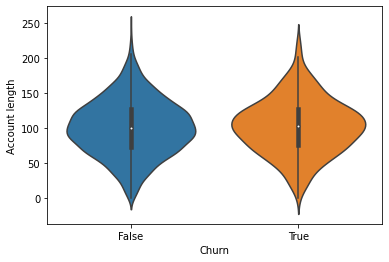

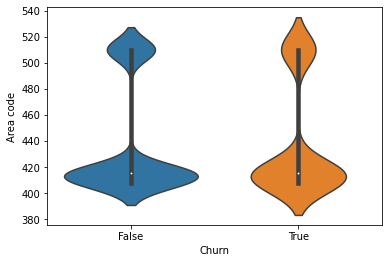

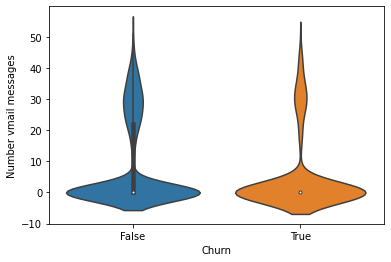

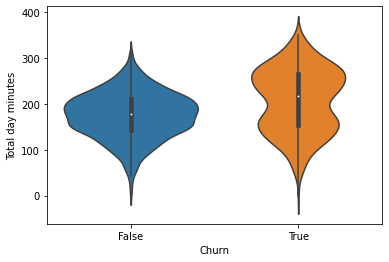

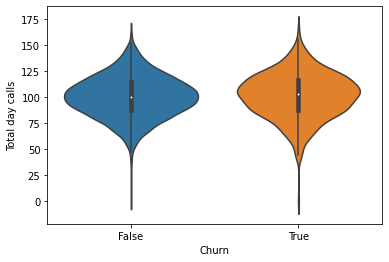

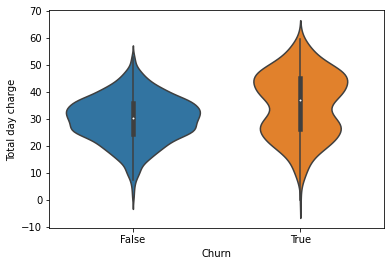

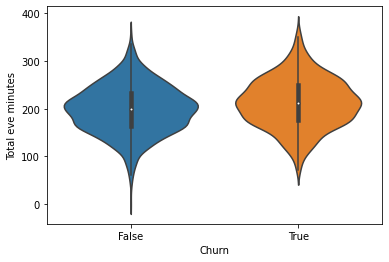

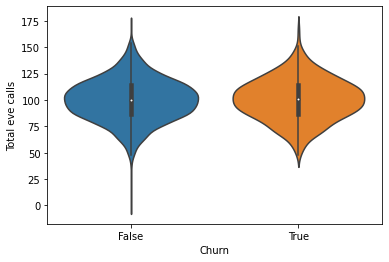

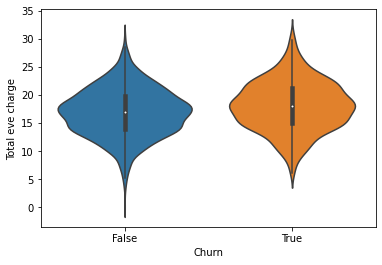

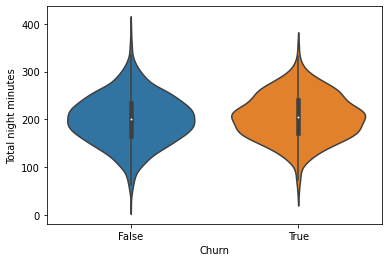

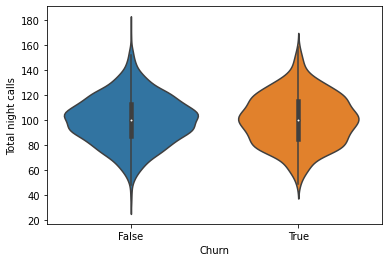

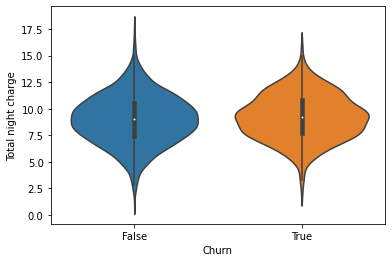

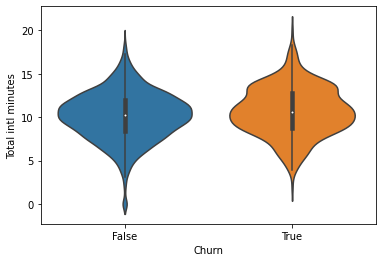

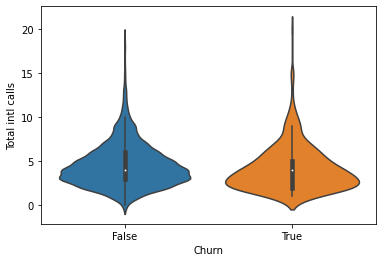

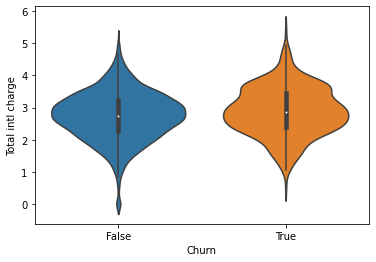

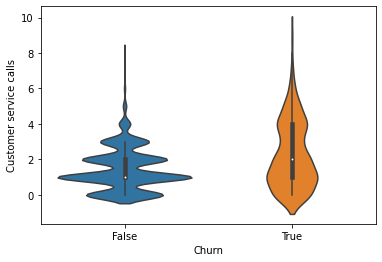

In [21]:
#Mostrar un gráfico por cada variable dependiente
for x in df.select_dtypes(include=np.number):
    sns.violinplot(x='Churn', y=x, data=df)
    plt.show()

#Pregunta 2:


##Preparación para los modelos

In [22]:
#Datos de entrenamiento
X_train = d2.drop(columns='Churn')
y_train = d2['Churn']

In [23]:
#Datos de validación
X_test = d1.drop(columns='Churn')
y_test = d1['Churn'] 

##Naive Bayes

In [24]:
X_train = X_train.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)

In [25]:
#Entrenar el modelo
classifier = GaussianNB().fit(X_train, y_train)

In [26]:
#Comprobar las predicciones
y_pred = classifier.predict(X_test)

Confusion matrix, without normalization
[[550  22]
 [ 52  43]]
Normalized confusion matrix
[[0.96153846 0.03846154]
 [0.54736842 0.45263158]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


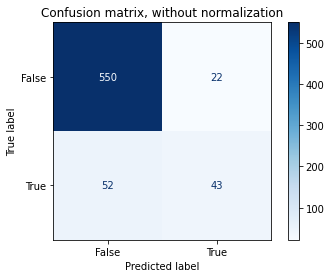

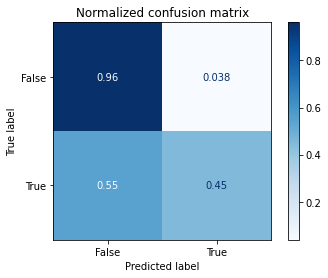

In [27]:
#Matriz de confusión
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
#Obtener la probabilidad de las predicciones
y_pred_prob = classifier.predict_proba(X_test)

In [29]:
#Obtener los falsos positivos, verdaderos positivos, etc
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [30]:
#Calcular curva ROC
roc_aucBayes = auc(false_positive_rate1, true_positive_rate1)
roc_aucBayes

0.8349650349650349

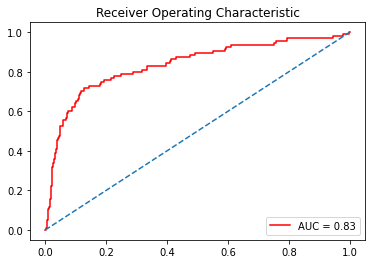

In [31]:
#Mostrar gráfico de curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'AUC = %0.2f' % roc_aucBayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.show()

##KNN

In [32]:
#Transformar los datos de entrenamiento a numéricos
X_train2 = StandardScaler().fit_transform(X_train)
X_test2 = StandardScaler().fit_transform(X_test)

In [33]:
#Tuning: se realiza para obtener las mejores distancias entre los vecinos y tener un mejor modelo
k_range = range(1, 31)
k_scores = []

In [34]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

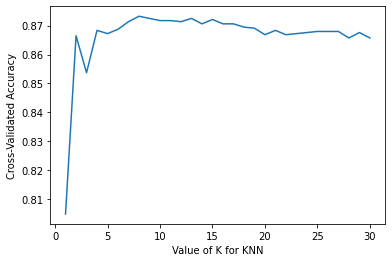

In [35]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
k_scores.index(max(k_scores))+1

8

In [37]:
#Entrenar el modelo
classifier = KNeighborsClassifier(n_neighbors=9).fit(X_train2, y_train)

In [38]:
#Predicciones
y_pred = classifier.predict(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[569   3]
 [ 74  21]]
Normalized confusion matrix
[[0.99475524 0.00524476]
 [0.77894737 0.22105263]]


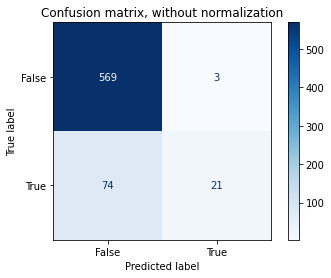

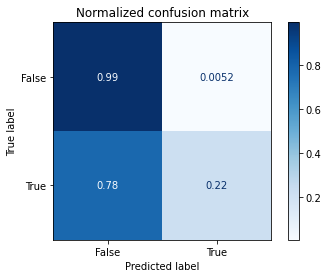

In [39]:
#Matriz de confusión
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test2, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [40]:
#Probabilidades de predicción
y_pred_prob = classifier.predict_proba(X_test2)

In [41]:
#Falsos positivos, verdaderos positivos
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [42]:
#Curva ROC
roc_aucKNN = auc(false_positive_rate3, true_positive_rate3)
roc_aucKNN

0.8233805668016194

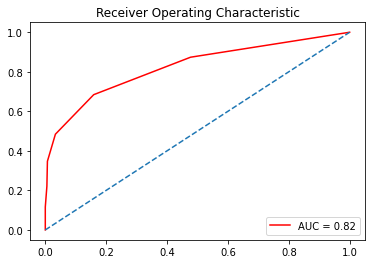

In [43]:
#Mostrar Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate3,true_positive_rate3, color='red',label = 'AUC = %0.2f' % roc_aucKNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.show()

##Decision Tree

In [44]:
#Tuning: se realiza para obtener los mejores parámetros
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [45]:
#Buscar los mejores parámetros
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [46]:
#Mostrar los mejores parámetros
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)


In [47]:
#Entrenar el árbol de decisión con los mejores parámetros
classifier = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=10).fit(X_train, y_train)

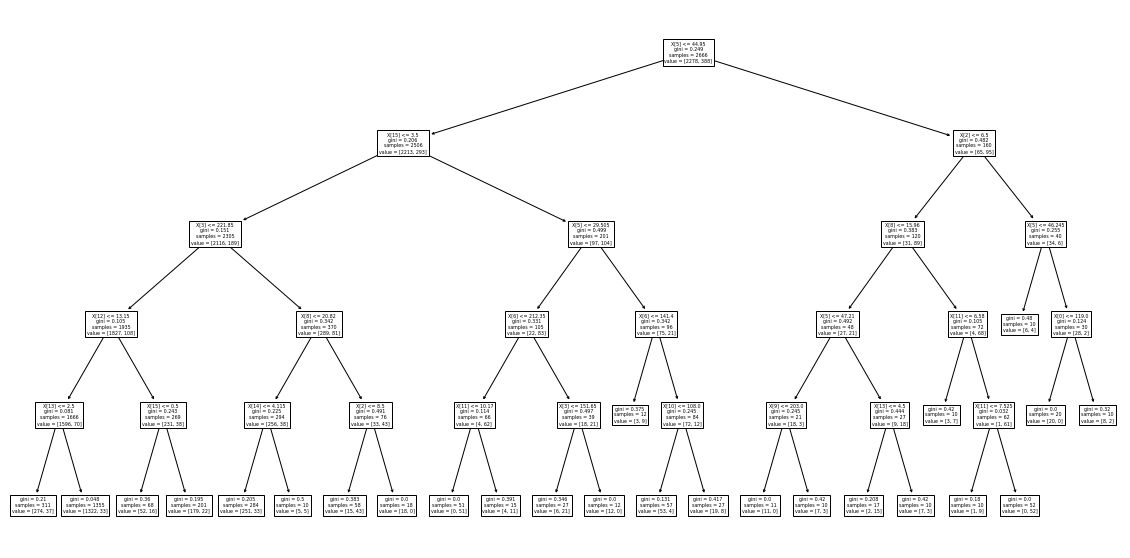

In [48]:
#Mostrar árbol de decisión
plt.figure(figsize = (20,10))
tree.plot_tree(classifier)
plt.show()

In [49]:
#Verificar lo predecido
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[564   8]
 [ 34  61]]
Normalized confusion matrix
[[0.98601399 0.01398601]
 [0.35789474 0.64210526]]


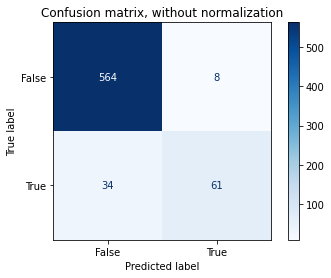

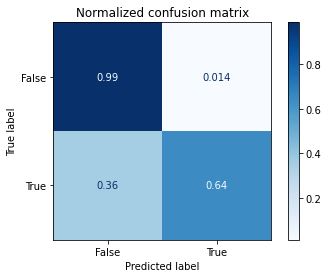

In [50]:
#Matriz de confusión
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [51]:
#Obtener la probabilidad de lo predecido
y_pred_prob = classifier.predict_proba(X_test)

In [52]:
#Verdaderos positivos, falsos positivos
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [53]:
#Obtener curva ROC
roc_aucTree = auc(false_positive_rate2, true_positive_rate2)
roc_aucTree

0.8843393448656606

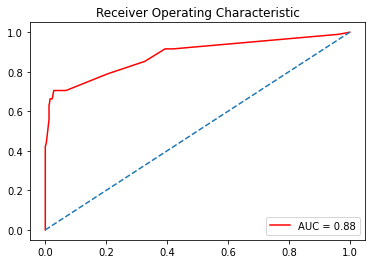

In [54]:
#Mostrar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2,true_positive_rate2, color='red',label = 'AUC = %0.2f' % roc_aucTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.show()

##Redes neuronales

In [55]:
#Tuning: se realiza para obtener los mejores parámetros para el modelo
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [56]:
#Se busca el mejor modelo
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [57]:
#Mostrar mejores parámetros
print(grid.best_estimator_)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20,), max_iter=500)


In [58]:
#Construir red neuronal con los mejores parámetros
classifier = MLPClassifier(alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate='adaptive', max_iter=500).fit(X_train, y_train)

In [59]:
#Predicciones
y_pred = classifier.predict(X_test)

Confusion matrix, without normalization
[[564   8]
 [ 76  19]]
Normalized confusion matrix
[[0.98601399 0.01398601]
 [0.8        0.2       ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


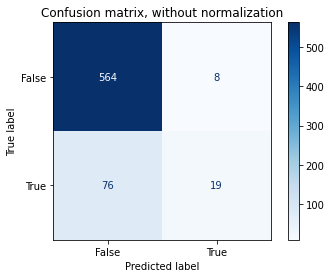

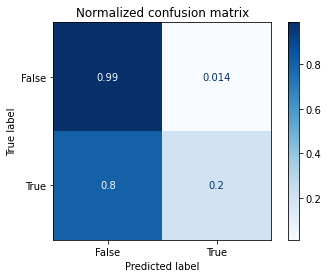

In [60]:
#Matriz de confusión
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [61]:
#Probabilidades de las predicciones
y_pred_prob = classifier.predict_proba(X_test)

In [62]:
#Falsos positivos, verdaderos positivos
false_positive_rate4, true_positive_rate4, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [63]:
#Curva ROC
roc_aucRedes = auc(false_positive_rate4, true_positive_rate4)
roc_aucRedes

0.6792234081707766

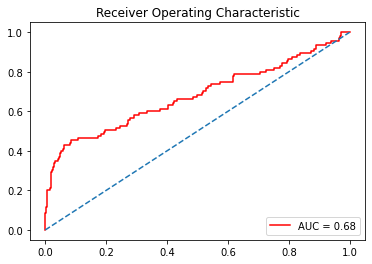

In [64]:
#Mostrar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate4,true_positive_rate4, color='red',label = 'AUC = %0.2f' % roc_aucRedes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.show()

##Comparación de modelos

###Comparación de curva ROC

Comparación de todas las curvas ROCs de los modelos:
- AUC Decision Tree = 0.88
- AUC KNN = 0.82
- AUC Naive Bayes = 0.83
- AUC Redes neuronales = 0.68

**Conclusiones:**
- En base a las curvas ROCs obtenidas, se puede concluir que el mejor modelo  es el de Decision Tree ya que tiene la curva ROC más alta con un valor de 0.88

- El peor modelo en base a las curvas ROCs es el de redes neuronales con un valor de 0.68. Este modelo es el peor ya que tiene la curva ROC más baja de todos los demás modelos

- En base a las curvas ROC, se puede concluir que todos los modelos son buenos, especialmente el KNN, Decision Tree y Naive Bayes con un valor de 0.80 para arriba. Este es un valor bastante alto y muy cercano a 1 por lo que se puede concluir que los modelos son eficientes. El modelo de redes neuronales también es bueno con una curva ROC de 0.70 aprox, pero no es tan efectivo como los otros.


###Mostrar todas las curvas

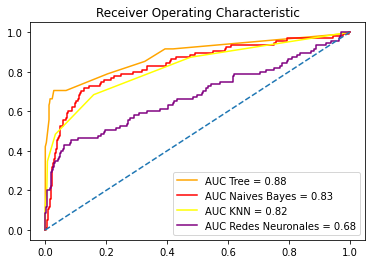

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2,true_positive_rate2, color='orange',label = 'AUC Tree = %0.2f' % roc_aucTree)
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'AUC Naives Bayes = %0.2f' % roc_aucBayes)
plt.plot(false_positive_rate3,true_positive_rate3, color='yellow',label = 'AUC KNN = %0.2f' % roc_aucKNN)
plt.plot(false_positive_rate4,true_positive_rate4, color='purple',label = 'AUC Redes Neuronales = %0.2f' % roc_aucRedes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.show()